In [1]:
import numpy as np
import pandas as pd

In [2]:
!ls

ALL.ipynb
picture.jpg
README.md
test.csv
Test.ipynb
Troye.csv
Word.ipynb


In [3]:
songs = pd.read_csv('Troye.csv')

In [4]:
songs.head()

,Song,SongID,Lyric
0,There For You,480426313,"I woke up pissed off today.And lately, everyon..."
1,for him.,37955044,We are runnin' so fast.And we never look back....
2,YOUTH,36668810,"What if, what if we run away?.What if, what if..."
3,Strawberries &amp; Cigarettes,544247584,Remember when we first met?.You said “light my...
4,BLUE,37955047,"Love it's hard, I know.All your lights are red..."


In [6]:
songs.dtypes

Song      object
SongID     int64
Lyric     object
dtype: object

In [7]:
import re
from unidecode import unidecode
words = []

In [10]:
for index,row in songs['Lyric'].iteritems():
    row = str(row).lower()
    new_words = re.findall(r"\b[a-z']+[a-z']+\b",unidecode(row))
    words = words + new_words
    print('index:{},{},{} new words'.format(index,row[:20],len(new_words)))

index:0,i woke up pissed off,312 new words
index:1,we are runnin' so fa,312 new words
index:2,what if, what if we ,267 new words
index:3,remember when we fir,319 new words
index:4,love it's hard, i kn,284 new words
index:5,i’m so tired of love,306 new words
index:6,i am tired of this p,264 new words
index:7,i just wanna go back,382 new words
index:8,trying hard not to f,334 new words
index:9,as the smile fell fr,329 new words
index:10,shine on, diamond.do,187 new words
index:11,i'm down to my skin ,406 new words
index:12,i wanna sleep next t,230 new words
index:13,the sun sets longer.,304 new words
index:14,the truth runs wild.,300 new words
index:15,can anybody find me.,152 new words
index:16,we are runnin' so fa,346 new words
index:17,in the crowd, alone.,215 new words
index:18,i heard.that you're ,212 new words
index:19,written by：bea mille,322 new words
index:20,glow is low and it's,219 new words
index:21,so tell me how i'm g,211 new words
index:22,sweet life livin.poo,256 new word

In [11]:
vocab = set(words)

In [12]:
word_to_index = {w: i  for i,w in enumerate(vocab)}

In [14]:
index_to_word = {i:w for w,i in word_to_index.items()}

In [15]:
word_indices = [word_to_index[word] for word in vocab]

In [33]:
len(word_indices)

1342

In [17]:
vocab_n = len(vocab)

### previous + next

In [20]:
ntk = [vocab_n]

In [22]:
X_indices_of_ones = np.array(word_indices + word_indices)

In [24]:
previous_word = ntk + word_indices[:-1]

In [26]:
next_word = word_indices[1:]+ntk

In [29]:
y_indices_of_ones = np.array(previous_word + next_word)

##### X,y

In [42]:
X = np.zeros((X_indices_of_ones.shape[0],vocab_n + 1))

In [43]:
X.shape

(2684, 1343)

In [44]:
len(X_indices_of_ones)

2684

In [45]:
X[np.arange(X.shape[0]), X_indices_of_ones] = 1

In [46]:
y = np.zeros((y_indices_of_ones.shape[0],vocab_n+1))
y[np.arange(y.shape[0]),y_indices_of_ones] = 1

In [47]:
print(X.shape)
print(y.shape)

(2684, 1343)
(2684, 1343)


In [48]:
batch_size = 10
divisible_size = 2680

X_b = X[:divisible_size,:].reshape(int(divisible_size / batch_size),batch_size,vocab_n+1)
y_b = y[:divisible_size,:].reshape(int(divisible_size / batch_size),batch_size,vocab_n+1)

In [54]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam

encoding_size = 8

model = Sequential()
model.add(Dense(encoding_size,input_shape=(batch_size,vocab_n+1),activation='relu'))
model.add(Dense(vocab_n+1,activation='softmax'))

model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [55]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10, 8)             10752     
_________________________________________________________________
dense_10 (Dense)             (None, 10, 1343)          12087     
Total params: 22,839
Trainable params: 22,839
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.fit(X_b,y_b,nb_epoch=100)

Instructions for updating:
Use tf.cast instead.


C:\0D\CS\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/100
268/268 [==============================] - 1s 3ms/step - loss: 7.2039 - acc: 0.0000e+00
Epoch 2/100
268/268 [==============================] - 0s 774us/step - loss: 7.2022 - acc: 3.7313e-04
Epoch 3/100
268/268 [==============================] - 0s 752us/step - loss: 7.2013 - acc: 0.0015
Epoch 4/100
268/268 [==============================] - 0s 770us/step - loss: 7.2002 - acc: 0.0026
Epoch 5/100
268/268 [==============================] - 0s 800us/step - loss: 7.1988 - acc: 0.0019
Epoch 6/100
268/268 [==============================] - 0s 759us/step - loss: 7.1971 - acc: 0.0030
Epoch 7/100
268/268 [==============================] - 0s 763us/step - loss: 7.1953 - acc: 0.0030
Epoch 8/100
268/268 [==============================] - 0s 755us/step - loss: 7.1932 - acc: 0.0026
Epoch 9/100
268/268 [==============================] - 0s 739us/step - loss: 7.1908 - acc: 0.0030
Epoch 10/100
268/268 [============

In [57]:
encoding = model.layers[0].get_weights()[0]

In [58]:
encoding.shape

(1343, 8)

In [59]:
def closest_word_to_vector(word_vector,num_nearby):
    distances = np.linalg.norm(encoding - word_vector,axis=1)
    closest = np.argsort(distances)[:num_nearby]
    return [index_to_word[i] for i in closest]

In [62]:
def closest_word(word,num_nearby):
    ind = word_to_index[word]
    word_vector = encoding[ind]
    return closest_word_to_vector(word_vector,num_nearby)

In [63]:
closest_word('me',6)

['me', 'felt', 'inside', 'listen', 'time', 'sun']

In [64]:
def x_is_to_y_as_z_is_to(x,y,z,num_closest):
    x_v = encoding[word_to_index[x]]
    y_v = encoding[word_to_index[y]]
    z_v = encoding[word_to_index[z]]
    
    relationship_vector = x_v - y_v
    z_is_to = z_v + relationship_vector
    return closest_word_to_vector(z_is_to,num_closest)

In [65]:
x_is_to_y_as_z_is_to('me','you','run',5)

['sipping', 'stare', 'emo', 'wear', 'kid']

In [70]:
prediction_model = Sequential()
prediction_model.add(Dense(encoding_size,input_dim=vocab_n+1,activation='relu'))
prediction_model.add(Dense(vocab_n+1,activation='softmax'))

prediction_model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])
prediction_model.set_weights(model.get_weights())

In [71]:
prediction_model.set_weights(model.get_weights())

In [72]:
def words_likely_to_be_in_the_context_of(word,num_context):
    input_vector = np.zeros((1,vocab_n+1))
    input_vector[0,word_to_index[word]] = 1
    output_vector = prediction_model.predict(input_vector)[0]
    top_context = np.argsort(-output_vector)[:num_context]
    return [index_to_word[i] for i in top_context]

In [73]:
words_likely_to_be_in_the_context_of('animal',10)

['affair',
 'islands',
 'sing',
 'know',
 'close',
 'pays',
 'cares',
 'somebody',
 'ya',
 'stars']

In [76]:
def cosine_similarity(u,v):
    distance = 0.0
    dot = np.dot(u,v)
    norm_u = np.linalg.norm(u)
    
    norm_v = np.linalg.norm(v)
    cosin_similarity = dot /(norm_u * norm_v)
    
    return cosin_similarity

In [78]:
cosine_similarity(encoding[word_to_index['school']], encoding[word_to_index['my']])

0.7312237

### TSNE

In [79]:
import numpy as np
from sklearn.manifold import TSNE

In [81]:
X_embedded = TSNE(n_components=2,perplexity=100).fit_transform(encoding)

In [82]:
X_embedded.shape

(1343, 2)

In [114]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(50,25))

import pylab
pylab.rcParams['figure.figsize'] = (15, 8)

<Figure size 3600x1800 with 0 Axes>

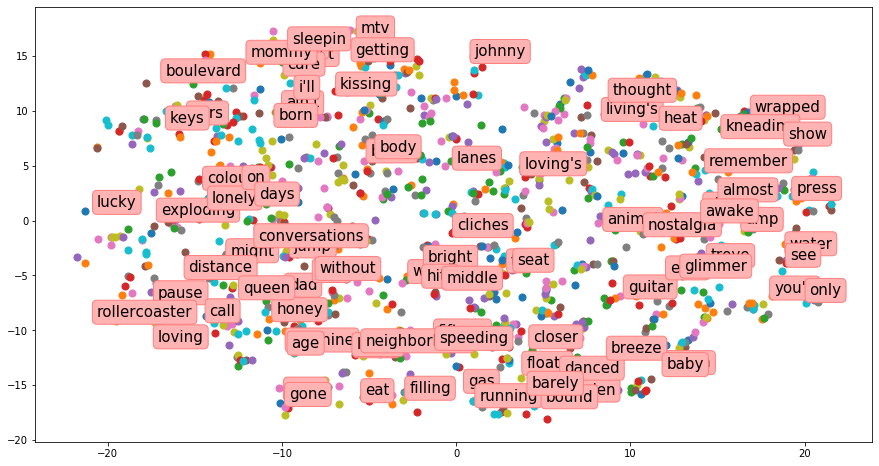

In [115]:
for i in range(0,len(X_embedded)):
    plt.scatter(X_embedded[i,0],X_embedded[i,1],s=50)
    
    if(i%15==0):
        plt.annotate(
            index_to_word[i],
            (X_embedded[i,0],X_embedded[i,1]),
            bbox = dict(boxstyle='round',
                        fc = (1.0,0.7,0.7),
                        ec = (1.,.5,.5)
                       ),
            fontsize = 15
        )
plt.show()

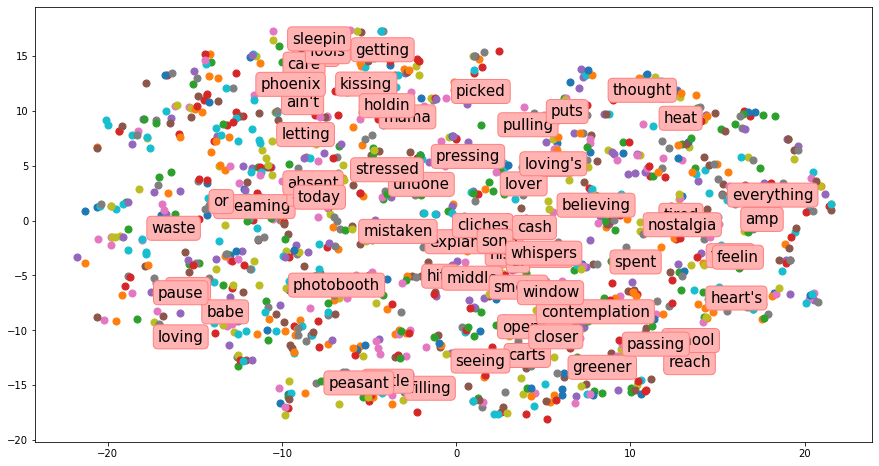

In [116]:
for i in range(0,len(X_embedded)):
    plt.scatter(X_embedded[i,0],X_embedded[i,1],s=50)
    
    if( i % 20 == 0):
        plt.annotate(
            index_to_word[i],
            (X_embedded[i,0],X_embedded[i,1]),
            bbox = dict(boxstyle='round',fc=(1.0,0.7,0.7),ec=(1.,.5,.5)),
            fontsize=15
        )
plt.show()

KeyError: 1342

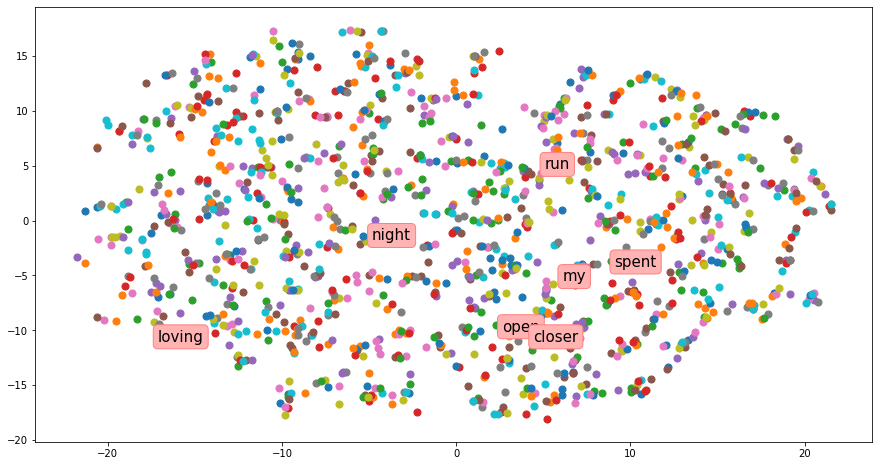

In [117]:
import matplotlib.pyplot as plt
words_of_interest = [
    'my',
    'run',
    'loving',
    'closer',
    'open',
    'spent',
    'night'
]

for i in range(0,len(X_embedded)):
    plt.scatter(X_embedded[i,0],X_embedded[i,1],s=50)
    
    if(index_to_word[i] in words_of_interest):
        plt.annotate(
            index_to_word[i],
            ( X_embedded[i,0],X_embedded[i,1]),
            bbox = dict(boxstyle='round',fc=(1.0,0.7,0.7),ec=(1.,.5,.5)),
            fontsize = 15
        )
plt.show()

## Word Model

In [118]:
from __future__ import print_function

In [119]:
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.optimizers import RMSprop, Adam
from keras.utils.data_utils import get_file
import numpy as np
import pandas as pd
import random
import sys
import io
import re
from unidecode import unidecode

In [120]:
songs = pd.read_csv('Troye.csv')

In [121]:
def get_tokenized_lines(df):
    words = []
    
    for index,row in df['Lyric'].iteritems():
        row = str(row).lower()
        for line in row.split('.'):
            new_words = re.findall(r"\b[a-z']+\b",unidecode(line))
            words = words + new_words
    return words

In [122]:
all_lyric_lines = get_tokenized_lines(songs)

In [124]:
all_lyric_lines[:20]

['i',
 'woke',
 'up',
 'pissed',
 'off',
 'today',
 'and',
 'lately',
 'everyone',
 'feels',
 'fake',
 'somewhere',
 'i',
 'lost',
 'a',
 'piece',
 'of',
 'me',
 'smoking',
 'cigarettes']

In [176]:
SEQ_LENGTH = 50 + 1
sequences = list()

for i in range(SEQ_LENGTH,len(all_lyric_lines)):
    seq = all_lyric_lines[i-SEQ_LENGTH:i]
    sequences.append(seq)
print('Total Sequences: %d' % len(sequences))

Total Sequences: 14483


In [180]:
print(sequences[:4])

[['i', 'woke', 'up', 'pissed', 'off', 'today', 'and', 'lately', 'everyone', 'feels', 'fake', 'somewhere', 'i', 'lost', 'a', 'piece', 'of', 'me', 'smoking', 'cigarettes', 'on', 'balconies', 'but', 'i', "can't", 'do', 'this', 'alone', 'sometimes', 'i', 'just', 'need', 'a', 'light', 'if', 'i', 'call', 'you', 'on', 'the', 'phone', 'need', 'you', 'on', 'the', 'other', 'side', 'so', 'when', 'your', 'tears'], ['woke', 'up', 'pissed', 'off', 'today', 'and', 'lately', 'everyone', 'feels', 'fake', 'somewhere', 'i', 'lost', 'a', 'piece', 'of', 'me', 'smoking', 'cigarettes', 'on', 'balconies', 'but', 'i', "can't", 'do', 'this', 'alone', 'sometimes', 'i', 'just', 'need', 'a', 'light', 'if', 'i', 'call', 'you', 'on', 'the', 'phone', 'need', 'you', 'on', 'the', 'other', 'side', 'so', 'when', 'your', 'tears', 'roll'], ['up', 'pissed', 'off', 'today', 'and', 'lately', 'everyone', 'feels', 'fake', 'somewhere', 'i', 'lost', 'a', 'piece', 'of', 'me', 'smoking', 'cigarettes', 'on', 'balconies', 'but', 'i',

testx = [1,2,3,4,5,6,7,8,9,0]
sequences = list()
for i in range(5,len(testx)+1):
    seq = testx[i-5:i]
    sequences.append(seq)

testx[0:5]

sequences

In [197]:
def save_doc(lines,filename):
    data = ''
    all_data = ''
    for line in lines:
        data = ' '.join(line)
        all_data = all_data + data + '\n'

    file = open(filename,'w')
    file.write(all_data)
    file.close()

In [198]:
out_filename = 'sequences.txt'
save_doc(sequences,out_filename)

In [200]:
vocab = set(all_lyric_lines)
word_to_index = {w:i for i,w in enumerate(vocab)}
index_to_word = {i:w for w,i in word_to_index.items()}
word_indices = [word_to_index[word] for word in vocab]
vocab_size = len(vocab)

In [201]:
print('vocabulary size: {}'.format(vocab_size))

vocabulary size: 1348


In [202]:
def get_tokenized_lines(lines,seq_len):
    tokenized = np.zeros((len(lines),seq_len))
    for r,line in enumerate(lines):
        for c,word in enumerate(line):
            tokenized[r,c] = word_to_index[word]
    return tokenized

In [203]:
tokenized_seq = get_tokenized_lines(sequences,SEQ_LENGTH)

In [204]:
tokenized_seq

array([[1218., 1215.,  423., ...,  998., 1107.,  170.],
       [1215.,  423.,    3., ..., 1107.,  170., 1129.],
       [ 423.,    3.,   25., ...,  170., 1129., 1148.],
       ...,
       [ 784.,  949., 1171., ..., 1005.,  634., 1148.],
       [ 949., 1171.,  484., ...,  634., 1148., 1005.],
       [1171.,  484., 1218., ..., 1148., 1005.,  634.]])

In [205]:
tokenized_seq[:,-1].shape

(14483,)

In [218]:
from keras.utils import to_categorical

X, y = tokenized_seq[:, :-1], tokenized_seq[:, -1]
y = to_categorical(y, num_classes=vocab_size)
seq_length = len(X[0])

In [219]:
print("X_shape", X.shape)
print("y_shape", y.shape)

X_shape (14483, 50)
y_shape (14483, 1348)


array([[1218., 1215.,  423., ..., 1092.,  998., 1107.],
       [1215.,  423.,    3., ...,  998., 1107.,  170.],
       [ 423.,    3.,   25., ..., 1107.,  170., 1129.],
       ...,
       [ 784.,  949., 1171., ...,  623., 1005.,  634.],
       [ 949., 1171.,  484., ..., 1005.,  634., 1148.],
       [1171.,  484., 1218., ...,  634., 1148., 1005.]])

In [221]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding

model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=seq_length))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, batch_size=128, epochs=50)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 50, 50)            67400     
_________________________________________________________________
lstm_12 (LSTM)               (None, 50, 100)           60400     
_________________________________________________________________
lstm_13 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_20 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_21 (Dense)             (None, 1348)              136148    
Total params: 354,448
Trainable params: 354,448
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
14483/14483 [==============================] - 21s 1ms/step - loss: 6.0368 - acc: 0.0414
Epoch 2/50
14483/14483 [=======

In [ ]:
import matplotlib.pyplot as plt
plt.plit(hisory.hisory['loss'])

In [222]:
import torch
import torch.nn as nn

In [223]:
model = nn.Sequential()

Embedding = nn.Embedding(vocab_size,50)
LSTM1 = nn.LSTM(50,100,1)
LSTM2 = nn.LSTM(100,100,1)
Dense1 = nn.Linear(100,100)
Dense2 = nn.Linear(100,1348)

In [225]:
model.add_module('Embedding',Embedding)

In [227]:
model.add_module('LSTM1',LSTM1)

In [229]:
model.add_module('LSTM2',LSTM2)

In [230]:
model.add_module('Dense1',Dense1)

In [231]:
model.add_module('Rule',nn.ReLU())

In [232]:
model.add_module('Dense2',Dense2)

In [233]:
model

Sequential(
  (Embedding): Embedding(1348, 50)
  (LSTM1): LSTM(50, 100)
  (LSTM2): LSTM(100, 100)
  (Dense1): Linear(in_features=100, out_features=100, bias=True)
  (Rule): ReLU()
  (Dense2): Linear(in_features=100, out_features=1348, bias=True)
)

In [237]:
class MyModel(nn.Module):
    def __init__(self,vocab_size,Embedding_size,hidden_size,device):
        super(MyModel,self).__init__()
        self.device = device
        self.embeddings = nn.Embedding(vocab_size,Embedding_size)
        self.lstm = nn.LSTM(Embedding_size,hidden_size,1)
        self.lstm1 = nn.LSTM(hidden_size,hidden_size,1)
        self.linear = nn.Linear(hidden_size,vocab_size)
    def forward(self,input,hidden=None):
        seq_len,batch_size = input.size()
        embeds = self.embeddings(input)
        if hidden is None:
            h0 = torch.zeros(1,batch_size,1).to(self.device)
            c0 = torch.zeros(1,batch_size,1).to(self.device)
        else:
            h0,c0 = hidden
        output,hidden = self.lstm(embeds,(h0,c0))
        output1,hidden1 = self.lstm1(embeds,(output,hidden))
        output2 = self.linear(output1.view(seq_len*batch_size,-1))
        return output,hidden

In [241]:
model = MyModel(len(word_to_index),50,1,'cuda').to('cuda')

AssertionError: Torch not compiled with CUDA enabled

In [242]:
a = torch.ones(1,1)

In [243]:
print(a.cuda())

AssertionError: Torch not compiled with CUDA enabled

In [ ]:
def train(**kwargs):
    dataloader = DataLoader(dataset = Vocab, batch_size = batch_size=128, shuffle = True, drop_last = True, num_workers = 1 )
    model = MyModel(len(word_to_index),50,1,cuda).to(cuda)
    optimizer = Adam(model.parameters())
    criterion = nn.CrossEntropyLoss()
    for epoch in range(50):
        epoch_loss = 0
        for i,data in enumerate(dataloader):
            data = data.long().transpose(1,0).contiguous()
            input,target = data[:-1,:],data[1:,:]
            input,target = input.to(cuda),target.to(cuda)
            optimizer.zero(grad)
            output,_ = model(input)
            loss = criterion(output)